* * *
# 아파트 얼마나 올랐을까? 매매 지수 비교하기
* * *
###  1. 한국감정원, 전국주택가격동향조사
###  2. 한국감정원, 공동주택실거래가격지수
###  3. KB주택가격동향
* * *
 <br>

* * *
# 매매지수 비교하기
* * *
## 1. 지수 Data 합치기
## 2. 지수 Scale 조정
## 3. 지수 변동률 구하기
## 4. Module 화
* * *
<br>

In [2]:
import os, sys
import math
import datetime
import time as t

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style

style.use('dark_background')
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["figure.figsize"] = (12,4)

# csv file 읽기

In [3]:
KAB1_csv_file = "Dataset/KAB_APT_tradeIndex1.csv" # 한국감정원 전국주택가격동향조사
KAB2_csv_file = "Dataset/KAB_APT_tradeIndex2.csv" # 한국감정원 공동주택실거래가격지수
KB_csv_file = "Dataset/KB_APT_tradeIndex.csv" # KB 주택가격동향

In [4]:
KAB1 = pd.read_csv(KAB1_csv_file, index_col="날짜", parse_dates=True)
KAB1.head()

,전국,서울,경기,인천,부산,대구,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
날짜,,,,,,,,,,,,,,,,,,
2003-11-30,63.231694,61.635809,66.789014,67.055586,59.824972,61.746512,58.339638,75.443766,51.526232,NaN,63.663111,59.265861,73.299666,56.264289,62.022490,63.901950,60.633403,53.419325
2003-12-31,62.871369,61.169206,66.495836,66.601190,59.339568,61.131105,58.010272,74.590024,51.144203,NaN,63.926759,59.094565,73.176316,56.295067,61.947547,63.819056,60.404171,53.340797
2004-01-31,62.719820,60.986643,66.231807,66.440460,59.196512,60.882542,57.895018,74.868931,51.056227,NaN,64.221913,59.228980,73.303211,56.310488,61.883733,63.531849,60.238899,53.442854
2004-02-29,62.930914,61.350289,66.325213,66.552366,59.174420,60.986334,58.060014,75.570550,51.222331,NaN,64.854490,59.544402,74.356451,56.608826,61.776734,63.631072,60.467854,53.383531
2004-03-31,63.181754,61.670955,66.503886,66.631654,59.274659,61.304512,58.154816,75.994564,51.621258,NaN,65.511519,59.838497,75.182870,57.134163,61.596105,63.806908,60.790359,53.333128


In [5]:
KAB2 = pd.read_csv(KAB2_csv_file, index_col="날짜", parse_dates=True)
KAB2.head()

,전국,서울,부산,대구,인천,광주,대전,울산,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
날짜,,,,,,,,,,,,,,,,,,
2006-01-31,62.0,60.5,49.8,62.6,62.3,54.2,75.7,48.9,69.6,69.2,61.3,65.3,75.6,57.2,51.0,66.1,63.0,38.7
2006-02-28,62.7,61.6,49.5,62.8,62.7,53.9,75.2,49.0,69.6,70.5,61.9,66.4,76.3,57.5,50.6,66.1,62.9,37.6
2006-03-31,63.3,63.0,49.1,62.6,63.1,53.8,74.5,49.8,72.7,71.4,60.1,66.9,77.2,58.2,51.1,66.2,63.2,35.8
2006-04-30,63.8,63.9,48.7,62.5,63.6,53.7,73.9,50.4,69.5,72.2,60.9,67.7,77.1,58.5,51.4,66.0,62.8,36.0
2006-05-31,64.1,64.0,48.3,62.1,64.1,53.0,73.4,51.7,72.1,73.2,62.0,67.4,75.2,58.6,52.6,66.0,62.7,36.5


In [6]:
KB = pd.read_csv(KB_csv_file, index_col="날짜", parse_dates=True)
KB.head()

,전국,서울,부산,대구,인천,광주,대전,울산,수도권,세종,경기,강원,충북,충남,전북,전남,경북,경남,제주
날짜,,,,,,,,,,,,,,,,,,,
1986-01-31,20.973143,17.152933,20.092425,24.91809,26.145212,30.593922,32.732911,25.969996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-02-28,20.973143,17.182661,20.179217,24.91809,26.145212,30.767422,32.732911,25.922519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-31,20.934518,17.152933,20.092425,25.05254,25.937049,30.246921,32.619386,25.637656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-04-30,20.818644,17.034022,20.005633,25.05254,25.770519,30.420421,32.619386,25.637656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-05-31,20.664146,16.944839,19.745256,25.05254,25.520724,30.246921,32.619386,25.969996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 지역명 통일

In [7]:
KAB1.columns.sort_values()

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전국', '전남', '전북', '제주', '충남', '충북'],
      dtype='object')

In [8]:
KAB2.columns.sort_values()

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산', '인천',
       '전국', '전남', '전북', '제주', '충남', '충북'],
      dtype='object')

In [9]:
KB.columns.sort_values() # 수도권

Index(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '수도권', '울산',
       '인천', '전국', '전남', '전북', '제주', '충남', '충북'],
      dtype='object')

# Dataframe 합치기

In [10]:
concat_df = pd.concat([KAB1["전국"], KAB2["전국"], KB["전국"]], axis=1)
concat_df.columns = ["감정원 전국주택가격동향", "감정원 공동주택실거래", "KB 주택가격동향"]
concat_df

,감정원 전국주택가격동향,감정원 공동주택실거래,KB 주택가격동향
날짜,,,
1986-01-31,NaN,NaN,20.973143
1986-02-28,NaN,NaN,20.973143
1986-03-31,NaN,NaN,20.934518
1986-04-30,NaN,NaN,20.818644
1986-05-31,NaN,NaN,20.664146
...,...,...,...
2020-06-30,101.479542,110.4,102.149091
2020-07-31,102.379117,113.2,103.284235
2020-08-31,103.040213,NaN,104.246387


In [11]:
concat_df = concat_df.dropna()
concat_df

,감정원 전국주택가격동향,감정원 공동주택실거래,KB 주택가격동향
날짜,,,
2006-01-31,66.385592,62.0,64.871651
2006-02-28,66.769883,62.7,65.275509
2006-03-31,67.317416,63.3,65.807996
2006-04-30,68.001525,63.8,66.507946
2006-05-31,68.807576,64.1,67.334557
...,...,...,...
2020-03-31,100.354745,107.0,101.295022
2020-04-30,100.737698,107.0,101.547594
2020-05-31,100.899250,108.0,101.658462


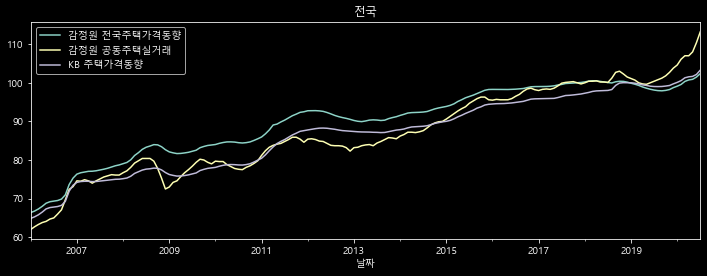

In [12]:
concat_df.plot(title="전국") #KAB 2017.11 = 100, KB 2019.01 = 100

# 지수 Scale 조정 (2006년01월 = 100)

In [13]:
(concat_df["감정원 전국주택가격동향"] / concat_df["감정원 전국주택가격동향"][0]) * 100

날짜
2006-01-31    100.000000
2006-02-28    100.578878
2006-03-31    101.403655
2006-04-30    102.434162
2006-05-31    103.648358
                 ...    
2020-03-31    151.169465
2020-04-30    151.746327
2020-05-31    151.989681
2020-06-30    152.863804
2020-07-31    154.218881
Name: 감정원 전국주택가격동향, Length: 175, dtype: float64

In [14]:
concat_df = concat_df.apply(lambda x:(x/x[0])*100)
concat_df

,감정원 전국주택가격동향,감정원 공동주택실거래,KB 주택가격동향
날짜,,,
2006-01-31,100.000000,100.000000,100.000000
2006-02-28,100.578878,101.129032,100.622550
2006-03-31,101.403655,102.096774,101.443381
2006-04-30,102.434162,102.903226,102.522357
2006-05-31,103.648358,103.387097,103.796582
...,...,...,...
2020-03-31,151.169465,172.580645,156.146822
2020-04-30,151.746327,172.580645,156.536164
2020-05-31,151.989681,174.193548,156.707066


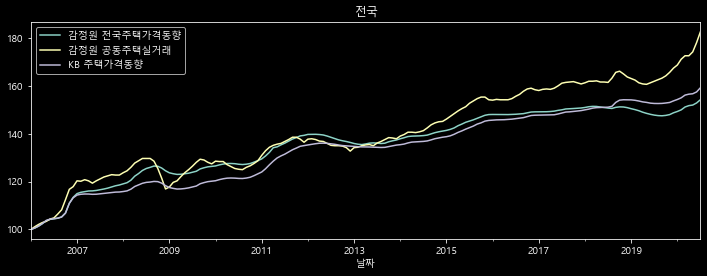

In [15]:
concat_df.plot(title="전국") # 2006년01월 = 100

# 주택가격 변동률

In [16]:
concat_df.loc["2006-01-31"]

감정원 전국주택가격동향    100.0
감정원 공동주택실거래     100.0
KB 주택가격동향       100.0
Name: 2006-01-31 00:00:00, dtype: float64

In [17]:
concat_df.loc["2020-07-31"]

감정원 전국주택가격동향    154.218881
감정원 공동주택실거래     182.580645
KB 주택가격동향       159.213204
Name: 2020-07-31 00:00:00, dtype: float64

In [18]:
((concat_df.loc["2020-07-31"] - concat_df.loc["2006-01-31"]) / concat_df.loc["2006-01-31"]) * 100

감정원 전국주택가격동향    54.218881
감정원 공동주택실거래     82.580645
KB 주택가격동향       59.213204
dtype: float64

In [19]:
((concat_df.loc["2020-07-31"] - concat_df.loc["2019-01-31"]) / concat_df.loc["2019-01-31"]) * 100

감정원 전국주택가격동향     2.496870
감정원 공동주택실거래     11.968348
KB 주택가격동향        3.284235
dtype: float64

In [20]:
index_diff = (concat_df.loc["2020-07-31"] - concat_df.loc["2019-01-31"])
rising_rate = (index_diff / concat_df.loc["2019-01-31"]) * 100

rising_rate = rising_rate.round(1).astype("str") + "%"
rising_rate

감정원 전국주택가격동향     2.5%
감정원 공동주택실거래     12.0%
KB 주택가격동향        3.3%
dtype: object

In [21]:
rising_rate = rising_rate.rename("변동률").to_frame()
rising_rate

,변동률
감정원 전국주택가격동향,2.5%
감정원 공동주택실거래,12.0%
KB 주택가격동향,3.3%


# Module 화 (def)

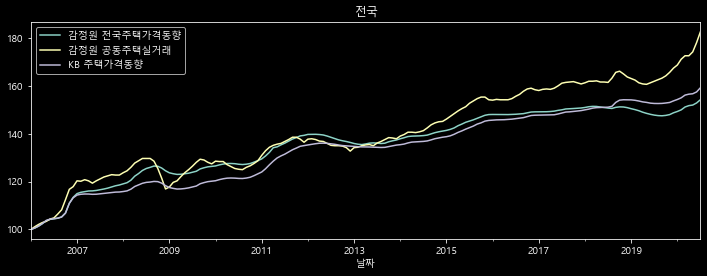

In [22]:
sido = "전국"

# dataframe 병합
concat_df = pd.concat([KAB1[sido], KAB2[sido], KB[sido]], axis=1)
concat_df.columns = ["감정원 전국주택가격동향", "감정원 공동주택실거래", "KB 주택가격동향"]

# NA 제거
concat_df = concat_df.dropna()

# 2006년1월 = 100 scaling #세종2013년4월=100
concat_df = concat_df.apply(lambda x:(x/x[0])*100)

# plot
concat_df.plot(title=sido) # 2006년01월 = 100

In [23]:
def get_concat_df(KAB1, KAB2, KB, sido = "전국"):
    
    # dataframe 병합
    concat_df = pd.concat([KAB1[sido], KAB2[sido], KB[sido]], axis=1)
    concat_df.columns = ["감정원 전국주택가격동향", "감정원 공동주택실거래", "KB 주택가격동향"]

    # NA 제거
    concat_df = concat_df.dropna()

    # 2006년1월 = 100 scaling
    concat_df = concat_df.apply(lambda x:(x/x[0])*100)

    # plot
    concat_df.plot(title=sido) # 2006년01월 = 100
    
    return concat_df

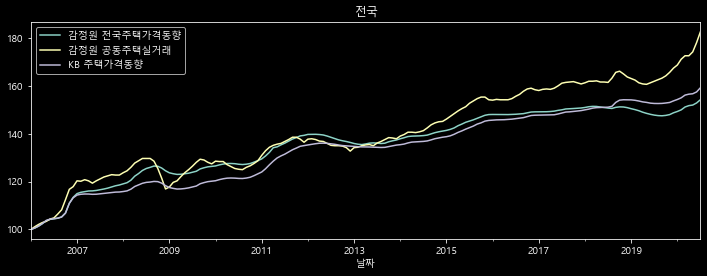

In [24]:
concat_df = get_concat_df(KAB1, KAB2, KB, sido = "전국")

In [25]:
def get_rising_rate(concat_df, start_date="2019-01-31", end_date="2020-07-31"):
    
    index_diff = (concat_df.loc[end_date] - concat_df.loc[start_date])
    rising_rate = (index_diff / concat_df.loc[start_date]) * 100
    rising_rate = rising_rate.round(1).astype("str") + "%"
    rising_rate = rising_rate.rename("변동률").to_frame()
    
    return rising_rate

In [26]:
rising_rate = get_rising_rate(concat_df, start_date="2019-01-31", end_date="2020-07-31")
rising_rate

,변동률
감정원 전국주택가격동향,2.5%
감정원 공동주택실거래,12.0%
KB 주택가격동향,3.3%


In [27]:
def get_rising_rate_table(concat_df, first_date="2006-01-31"):
    # 구간1 : 2017년 8.2 대책 이후 1년 (2017-08-31 ~ 2018-09-30)
    rising_rate1 = get_rising_rate(concat_df, start_date="2017-08-31", end_date="2018-09-30")

    # 구간2 : 2018년 9.13 대책 이후 20년7월까지 (2018-09-30 ~ 2020-07-31)
    rising_rate2 = get_rising_rate(concat_df, start_date="2018-09-30", end_date="2020-07-31")

    # 구간3 : 2017년 8.2 대책 이후 20년7월까지 (2017-08-31 ~ 2020-07-31)
    rising_rate3 = get_rising_rate(concat_df, start_date="2017-08-31", end_date="2020-07-31")

    # 구간4 : 2006년1월 부터 2020년7월까지 (2006-01-31 ~ 2020-07-31)
    rising_rate4 = get_rising_rate(concat_df, start_date=first_date, end_date="2020-07-31")
    
    first_date = '.'.join(first_date.split('-')[0:2])

    rate_df = pd.concat([rising_rate1,rising_rate2,rising_rate3,rising_rate4], axis=1)
    rate_df.columns = ["2017.08-2018.09", "2018.09-2020.07", \
                       "2017.08-2020.07", first_date+"-2020.07"]
    
    return rate_df

In [28]:
get_rising_rate_table(concat_df, first_date="2006-01-31")

,2017.08-2018.09,2018.09-2020.07,2017.08-2020.07,2006.01-2020.07
감정원 전국주택가격동향,0.4%,2.1%,2.6%,54.2%
감정원 공동주택실거래,2.6%,10.2%,13.1%,82.6%
KB 주택가격동향,2.7%,4.0%,6.8%,59.2%
